# Analisis Deteksi Sentiment Acara TV Indonesia dengan Membandingkan Algoritma Machine Learning dan Fine Tuning Bert Tensorflow

- Latar belakang = Acara televisi yang beragam disajikan di berbagai stasiun televisi memiliki tingkat kualitas yang berbeda-beda. Sentimen masyarakat dapat dijadikan sebagai salah satu indikator oleh stasiun televisi untuk menentukan kualitas suatu acara. Pada twitter dapat dilakukan proses penggalian informasi mengenai sentimen masyarakat terhadap kualitas acara yang ditayangkan. Salah satu teknik penggalian informasi pada twitter adalah analisis sentimen. Pada  projek kali ini dilakukan analisis deteksi sentimen acara tv dengan algoritma machine learning dan transfer learning.
- Tujuan 
> 1. Mengetahui cara kerja dalam menganalisis sentimen dengan python
> 2. Mengetahui proses dalam klasifikasi sentimen di NLP dengan metode Algoritma Machine Learning dan Fine Tuning Bert Tensorflow
> 3. Mengetahui perbandingan algoritma dari segi proses komputasi dan akurasi
> 4. Program mampu melakukan analisis deteksi sentimen acara tv berdasarkan kalimatnya
- Urgensi = Membuat Analisis Deteksi Sentiment Acara TV Indonesia dengan Membandingkan proses komputasi dan akurasi dari Algoritma Machine Learning dengan Fine Tuning Bert Tensorflow

# Machine Learning 

# 01 Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle

%matplotlib inline

In [2]:
# Install library Sastrawi
!pip install sastrawi

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# 02 Data Acquisition
Penjelasan Sentiment

0: SMS Negative
1: SMS Positive

In [4]:
dt = pd.read_csv('https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentimen_tayangan_tv.csv')
dt.head()

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              400 non-null    int64 
 1   Sentiment       400 non-null    object
 2   Acara TV        400 non-null    object
 3   Jumlah Retweet  400 non-null    int64 
 4   Text Tweet      400 non-null    object
dtypes: int64(2), object(3)
memory usage: 15.8+ KB


In [6]:
#Mengetahui nilai kategori dari tiap variabel
col = dt.iloc[:,[2]]
col
for i in col:
  print(dt[i].unique())

['HitamPutihTransTV' 'IndonesiaLawyersClubTvOne' 'KickAndyMetroTV'
 'MataNajwaMetroTV']


In [7]:
#Mengetahui frekuensi tiap kategori dari variabel dataset
for i in col:
  print(dt[i].value_counts())

IndonesiaLawyersClubTvOne    100
MataNajwaMetroTV             100
HitamPutihTransTV            100
KickAndyMetroTV              100
Name: Acara TV, dtype: int64


In [8]:
#Encoding pada sentimet dan acara tv
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dt['Sentiment'] = labelencoder.fit_transform(dt['Sentiment'])
dt['Acara TV'] = labelencoder.fit_transform(dt['Acara TV'])

In [9]:
print('Total Jumlah SMS:', dt.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] Negative\t:', dt[dt.Sentiment == 0].shape[0], 'data')
print('-- [1] Positive\t:', dt[dt.Sentiment == 1].shape[0], 'data')

Total Jumlah SMS: 400 data

terdiri dari (label):
-- [0] Negative	: 200 data
-- [1] Positive	: 200 data


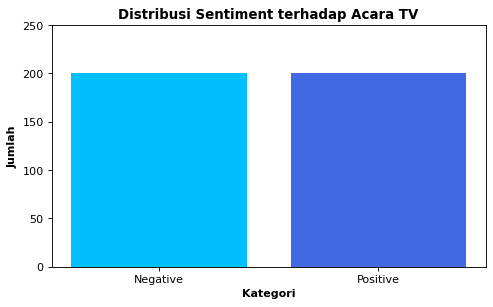

In [10]:
height = dt['Sentiment'].value_counts()
labels = ('Negative', 'Positive')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,250)
plt.title('Distribusi Sentiment terhadap Acara TV', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)
plt.show()

# 03 Text Preprocessing

## Case Folding

In [11]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [12]:
raw_sample = dt['Text Tweet'].iloc[50]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('\nCase folding\t: ', case_folding)

Raw data	:  Hitam putih bego, haruka diundang bentar biar pd liat younglex, udah gt malah dihina, Bego

Case folding	:  hitam putih bego haruka diundang bentar biar pd liat younglex udah gt malah dihina bego


## Word Normalization

In [13]:
key_norm = pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv')
print(key_norm.head(10))

key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi
5    6         acra       acara
6    7       acrany    acaranya
7    8       acrnya    acaranya
8    9       action        aksi
9   10       active       aktif


(3720, 3)

In [14]:
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

## Filtering (Stopword Removal)

In [15]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [16]:
len(stopwords_ind)

758

In [17]:
# Lihat daftar stopword yang disediakan NLTK
stopwords_ind[:20]

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara']

In [18]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['tsel', 'gb', 'rb', 'pd', 'gt']                    # Tambahkan kata lain dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [19]:
raw_sample = dt['Text Tweet'].iloc[50]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('\nCase folding\t\t: ', case_folding)
print('\nStopword removal\t: ', stopword_removal)

Raw data		:  Hitam putih bego, haruka diundang bentar biar pd liat younglex, udah gt malah dihina, Bego

Case folding		:  hitam putih bego haruka diundang bentar biar pd liat younglex udah gt malah dihina bego

Stopword removal	:  hitam putih bego haruka diundang bentar biar liat younglex udah dihina bego


## Stemming

In [20]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [21]:
raw_sample = dt['Text Tweet'].iloc[50]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Hitam putih bego, haruka diundang bentar biar pd liat younglex, udah gt malah dihina, Bego
Case folding		:  hitam putih bego haruka diundang bentar biar pd liat younglex udah gt malah dihina bego
Stopword removal	:  hitam putih bego haruka diundang bentar biar liat younglex udah dihina bego
Stemming		:  hitam putih bego haruka undang bentar biar liat younglex udah hina bego


## Text Preprocessing Pipeline

In [22]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [23]:
%%time
dt['clean_teks'] = dt['Text Tweet'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

Wall time: 1min 53s


In [24]:
dt

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet,clean_teks
0,1,1,0,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",undang n shanijkt hitamputih menang ssk jakart...
1,2,1,0,6,Selamat berbuka puasa Semoga amal ibadah hari ...,selamat buka puasa moga amal ibadah ni terima ...
2,3,1,0,9,"Ada nih di trans7 hitam putih, dia dpt penghar...",nih trans hitam putih harga norwegia hitamputih
3,4,1,0,2,selamat ya mas @adietaufan masuk hitamputih,selamat ya mas adietaufan masuk hitamputih
4,5,1,0,1,Asiknya nonton Hitam Putih Trans7,asiknya nonton hitam putih trans
...,...,...,...,...,...,...
395,396,0,3,0,ini apa banget deh gw paling kesel klo orang2 ...,banget deh kesel orang debat pakai emosi matan...
396,397,0,3,0,Orang miskin semakin miskin klo sekolah melaku...,orang miskin miskin sekolah pungut liar
397,398,0,3,0,"ga boLeh emosi, cepat tua, nonton #matanajwame...",emosi cepat tua nonton matanajwametrotv lihat ...
398,399,0,3,0,dr penampilan saja kyk preman taunya bkin kisr...,tampil preman tau bkin kisruh usak matanajwame...


# 04 Feature Engineering

In [25]:
# Pisahkan kolom fitur dan target
X = dt['clean_teks']
y = dt['Sentiment']

## Feature Extraction (TF-IDF & N-Gram)
Proses mengubah teks menjadi vector menggunakan metode TF-IDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

TfidfVectorizer()

In [27]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

1175


In [28]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['aa' 'aagym' 'abang' ... 'yukikatou' 'zaitun' 'zhonk']


In [29]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aa,aagym,abang,abas,abi,abraham,academi,acara,acung,adem,...,woidjojayanto,ya,yaampun,yadia,yag,younglex,yuk,yukikatou,zaitun,zhonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.340891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

## Feature Selection (Chi Square)

In [32]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [33]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=650) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 1175
Reduced feature number: 650


In [34]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,1.164059
1,0.359519
2,0.536612
3,0.435220
4,0.400486
...,...
1170,0.339689
1171,1.585854
1172,0.478482
1173,0.472109


In [35]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,1.164059,aa
1,0.359519,aagym
2,0.536612,abang
3,0.435220,abas
4,0.400486,abi
...,...,...
1170,0.339689,younglex
1171,1.585854,yuk
1172,0.478482,yukikatou
1173,0.472109,zaitun


In [36]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
520,8.374203,keren
384,7.686468,hitamputiht
418,6.488259,inspirasi
533,5.647581,kickandymetrotv
861,4.924489,putih
...,...,...
872,0.000087,rakyat
178,0.000036,botak
823,0.000031,pihak
295,0.000005,episode


In [37]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([ True, False,  True, ...,  True,  True, False])

In [38]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['aa',
 'abang',
 'abas',
 'abi',
 'abraham',
 'acara',
 'adem',
 'adietaufan',
 'adik',
 'adil',
 'adu',
 'agung',
 'ahmad',
 'ahokdjarotdirosi',
 'ajang',
 'ajarin',
 'ajha',
 'akar',
 'akibatya',
 'aksi',
 'aku',
 'al',
 'ala',
 'allah',
 'alu',
 'amat',
 'ambil',
 'anak',
 'anaktangsel',
 'anarkis',
 'ancam',
 'andik',
 'andy',
 'aneh',
 'angkat',
 'angket',
 'aniaya',
 'anies',
 'aniesbaswedan',
 'aniessandipemersatu',
 'anjay',
 'antem',
 'apa',
 'apartemen',
 'asal',
 'asik',
 'asiknya',
 'asli',
 'atas',
 'atlet',
 'baby',
 'bacot',
 'bae',
 'bagus',
 'bahagia',
 'bahasa',
 'baik',
 'bakarin',
 'bambang',
 'banding',
 'banget',
 'bangga',
 'bangkit',
 'bangkrut',
 'banyak',
 'basri',
 'basuki',
 'baswedan',
 'batal',
 'batas',
 'bawa',
 'bawah',
 'bayang',
 'bayar',
 'beda',
 'beliau',
 'benci',
 'bener',
 'berani',
 'berat',
 'berbelitbelit',
 'bermusyawara',
 'bersih',
 'besok',
 'betapa',
 'betawi',
 'biaya',
 'bicara',
 'bidang',
 'bidik',
 'bijaksana',
 'bilang',
 'bj',
 '

In [39]:
# Cara melihat vocab yang dihasilkan oleh TF_IDF
# tf_idf.vocabulary_ 

kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v                    # Jika iya, simpan fitur tersebut pada dictionary kosong diatas

In [40]:
kbest_feature

{'undang': 1136,
 'hitamputih': 383,
 'menang': 651,
 'prestasi': 845,
 'selamat': 955,
 'buka': 187,
 'moga': 684,
 'terima': 1078,
 'allah': 39,
 'nih': 733,
 'trans': 1101,
 'hitam': 382,
 'putih': 861,
 'norwegia': 742,
 'mas': 629,
 'adietaufan': 10,
 'asiknya': 79,
 'nonton': 741,
 'acara': 7,
 'komplit': 545,
 'tarik': 1053,
 'inspiratif': 419,
 'banget': 103,
 'suka': 1024,
 'keren': 520,
 'bro': 182,
 'hitamputihtrans': 385,
 'lihat': 588,
 'sanggu': 928,
 'ganteng': 320,
 'cinta': 217,
 'ikat': 401,
 'silaturahmi': 995,
 'lunamaya': 598,
 'kasih': 496,
 'adik': 11,
 'lancar': 569,
 'baik': 96,
 'bagus': 92,
 'pintar': 829,
 'hibur': 378,
 'ustadz': 1146,
 'tamu': 1049,
 'asal': 77,
 'kangen': 487,
 'tayang': 1060,
 'terimakasih': 1079,
 'malam': 610,
 'inspirasi': 418,
 'sobat': 1005,
 'rafatharonhp': 868,
 'ganda': 318,
 'seru': 979,
 'beda': 129,
 'rindu': 896,
 'nya': 746,
 'wihh': 1162,
 'hebat': 372,
 'kakek': 481,
 'nenek': 724,
 'tunggu': 1113,
 'sekian': 951,
 'yukika

In [41]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,aa,abang,abas,abi,abraham,acara,adem,adietaufan,adik,adil,...,wawas,whatsapp,wibawa,wihh,woidjojayanto,yaampun,yag,yuk,yukikatou,zaitun
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.493212,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 04 Modelling (Machine Learning)

In [42]:
'''
Supervised learning in Sklearn
https://scikit-learn.org/stable/supervised_learning.html
'''
from sklearn.naive_bayes import MultinomialNB           # Pilih salah satu algoritma supervised learning. Contoh ini menggunakan algoritma Naive Bayes
from sklearn.model_selection import train_test_split    # Digunakan untuk memisahkan data uji dan data latih
from joblib import dump                                 # Digunakan untuk menyimpan model yang telah dilatih

In [43]:
# Proses memisahkan data uji dan data latih. Perbandingan 80% untuk data latih, 20% untuk data uji
# Random_state digunakan untuk internal random generator
# Gunakan fitur (X) hasil seleksi fitur

# Split arrays or matrices into random train and test subsets.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, 
                                                    y, test_size=0.2, 
                                                    random_state=40)

In [44]:
# Training the model
%time
algorithm = MultinomialNB()        
model = algorithm.fit(X_train, y_train)   # Fitkan (latih) algoritma pada data latih & label latih 

dump(model, filename='model_1.joblib')

Wall time: 0 ns


['model_1.joblib']

In [45]:
%time
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

Wall time: 0 ns


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [46]:
# Tampilkan label sebenarnya pada data uji (actual label)
y_test

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

# 05 Model Evaluation

In [47]:
%time
# Hitung jumlah data yang berhasil di prediksi model 
# & jumlah data yang salah di prediksi
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Wall time: 0 ns
Jumlah prediksi benar	: 67
Jumlah prediksi salah	: 13
Akurasi pengujian	: 83.75 %


In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred)

print('Confusion matrix Naive Bayes:\n', cm)


Confusion matrix Naive Bayes:
 [[30 13]
 [ 0 37]]


In [49]:
from sklearn.metrics import classification_report

print('Classification report Naive Bayes:\n', classification_report(y_test, model_pred))


Classification report Naive Bayes:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        43
           1       0.74      1.00      0.85        37

    accuracy                           0.84        80
   macro avg       0.87      0.85      0.84        80
weighted avg       0.88      0.84      0.84        80



In [50]:
# Cross Validation
%time
from sklearn.model_selection import ShuffleSplit    # bisa pilih beberapa teknik cross validation
from sklearn.model_selection import cross_val_score # untuk mengetahui performa model pada cross validation

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy = (cross_val_score(model, X_kbest_features, y, cv=cv, scoring='accuracy'))

avg_accuracy = np.mean(cv_accuracy)


print('Naive Bayes')
print('Akurasi setiap split:', cv_accuracy)
print('Rata-rata akurasi pada cross validation:', avg_accuracy)


Wall time: 0 ns
Naive Bayes
Akurasi setiap split: [0.8125 0.9625 0.9    0.8375 0.9    0.825  0.9375 0.8875 0.9125 0.85  ]
Rata-rata akurasi pada cross validation: 0.8825


# Transfer Learning Bert

# 01 Install & Import Library

In [51]:
import random
import seaborn as sns


In [52]:
%tensorflow_version 2.x

# Gunakan tensorflow versi 2
import tensorflow as tf
print(tf.__version__)

UsageError: Line magic function `%tensorflow_version` not found.


In [53]:
# Instal libray transformer https://huggingface.co/
!pip -q install transformers

In [54]:
import transformers
print(transformers.__version__)

4.23.1


# 02 Data Acquisition
Penjelasan Sentiment 
* 0: Negative
* 1: Positive 


In [ ]:
!wget https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentimen_tayangan_tv.csv

In [ ]:
data = pd.read_csv('/content/dataset_tweet_sentimen_tayangan_tv.csv')
data.head()

In [ ]:
#Mengetahui nilai sentimen
col = data.iloc[:,[1]]
col
for i in col:
  print(data[i].unique())

In [ ]:
#Mengetahui frekuensi tiap kategori dari variabel dataset
for i in col:
  print(data[i].value_counts())

In [ ]:
#Mengetahui nilai sentimen
col_1 = data.iloc[:,[2]]
col_1
for i in col_1:
  print(data[i].unique())

In [ ]:
#Mengetahui frekuensi tiap kategori dari variabel dataset
for i in col_1:
  print(data[i].value_counts())

In [ ]:
#Label encoding mengubah setiap nilai dalam kolom menjadi angka yang berurutan
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data['Sentiment'] = labelencoder.fit_transform(data['Sentiment'])
data['Acara TV'] = labelencoder.fit_transform(data['Acara TV'])

In [ ]:
# Copy data
raw_data = data.copy()

# 03 Text Preprocessing

In [ ]:
import re

def text_preprocessing(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()                               # Menghapus whitespaces
  return text

In [ ]:
%time data['Text Tweet'] = data['Text Tweet'].apply(text_preprocessing)

In [ ]:
data.head()

In [ ]:
# Menghapus kolom yang tidak diperlukan pada datasets
del data['Id']
del data['Acara TV']
del data['Jumlah Retweet']

In [ ]:
data

In [ ]:
# Mengubah letak kolom text tweet sebelah kiri / disesuaikan pada code program
data = data[['Text Tweet', 'Sentiment']]

In [ ]:
data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# data.to_csv('/content/drive/MyDrive/KULIAH DESTY/SMT 5/clean_data.csv')

# 04 Train & Test Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size=0.2)
df_val, df_test = train_test_split(df_test, test_size=0.5)

df_train.shape, df_test.shape, df_val.shape

# 05 Load Tokenizer

In [ ]:
# Tentukan pre-trained model yang akan digunakan untuk fine-tuning
# Daftar model dapat ditemukan pada https://huggingface.co

PRE_TRAINED_MODEL = 'indobenchmark/indobert-base-p2'  # https://huggingface.co/indobenchmark/indobert-base-p2

In [ ]:
from transformers import BertTokenizer

bert_tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL)  # Load tokenizer dari pre-trained model

In [ ]:
# Lihat vocabulary dari pre-trained model yang telah di load sebelumnya
vocabulary = bert_tokenizer.get_vocab()

print('Panjang vocabulary:', len(vocabulary))
print(vocabulary)

In [ ]:
# Contoh Tokenisasi

id_data = 4 # Mengambil data indeks ke-5 pada dataframe

print('Kalimat:', raw_data['Text Tweet'][id_data])
print('BERT Tokenizer:', bert_tokenizer.tokenize(data['Text Tweet'][id_data]))

# 06 Input Formating
Teks harus dipecah menjadi token sebelum dimasukkan ke BERT, kemudian token tersebut harus dipetakan ke indeks pada kosakata tokenizer yang telah di load sebelumnya. Tokenisasi harus dilakukan oleh tokenizer yang disertakan dengan BERT.

## Contoh Input Formatting

In [ ]:
# Contoh input formatting untuk BERT. Input formating dapat menggunakan fungsi `encode_plus`

bert_input = bert_tokenizer.encode_plus(
    data['Text Tweet'][id_data],             # Sample kalimat                
    add_special_tokens = True,      # Tambahkan token [CLS] pada awal kalimat dan token [SEP] pada akhir kalimat
    padding = 'max_length',         # Tambahkan padding ke max_length menggunakan token [PAD] jika kalimat kurang dari max_length
    truncation = 'longest_first',   # Truncate jika kalimat lebih dari max_length
    max_length = 20,                # Tentukan max_length dari seluruh kalimat
    return_attention_mask = True,   # Mengembalikan nilai attention mask
    return_token_type_ids =True     # Mengembalikan nilai token type id (segment embedding)
    )

# Fungsi `encode_plus` mengembalikan 3 nilai: input_ids, token_type_ids, attention_mask
bert_input.keys()

In [ ]:
print('Kalimat\t\t:', raw_data['Text Tweet'][id_data])                                           # Data asli
print('Tokenizer\t:', bert_tokenizer.convert_ids_to_tokens(bert_input['input_ids']))    # Hasil input formatting + tokenizer
print('Input IDs\t:', bert_input['input_ids'])                                          # Input IDs : indeks token pada vocabulary tokenizer
print('Token Type IDs\t:', bert_input['token_type_ids'])                                # Token type IDs : menunjukkan urutan kalimat pada sequence (segment embedding)
print('Attention Mask\t:', bert_input['attention_mask'])                                # Attention mask : mengembalikan nilai [0,1]. 1 artinya token yang di masking, 0 token yang tidak di masking (diabaikan)

## Memilih Panjang Sequence (max_length)

In [ ]:
'''
Ada banyak cara untuk menentukan max_length
Intuisinya adalah kita tidak ingin memotong kalimat, atau terlalu banyak menambahkan padding (komputasi lebih lama)
Contoh ini, max_lenght ditentukan dari distribusi token pada dataset 
'''
token_lens = []

for txt in data['Text Tweet']:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))

sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 35]);
plt.xlabel('Token count');

In [ ]:
# Dapat dilihat dari grafik diatas, sebagian besar kalimat 
# tampaknya berisi kurang dari 30 token
# Maka, tentukan max_length nilai tengahnya 20

MAX_LEN = 20

## Input Formatting pada Data Latih & Uji

In [ ]:
# Buat fungsi untuk menggabungkan langkah tokenisasi, 
#menambahkan special tokens untuk keseluruhan data 
#sebagai input formatting ke model BERT
def convert_example_to_feature(sentence):  
  return bert_tokenizer.encode_plus(
      sentence, 
      add_special_tokens = True, 
      padding = 'max_length',
      truncation = 'longest_first',
      max_length = MAX_LEN, 
      return_attention_mask = True, 
      return_token_type_ids=True
    )

In [ ]:
# Buat fungsi untuk memetakan input hasil input formatting agar sesuai dengan model BERT
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,               # Sebagai token embedding
      "token_type_ids": token_type_ids,     # Sebagai segment embedding
      "attention_mask": attention_masks,    # Sebagai filter informasi mana yang kalkulasi oleh model
  }, label

In [ ]:
# Buat fungsi untuk iterasi pada setiap kalimat pada keseluruhan data
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
    
  for sentence, label in data.to_numpy():

    bert_input = convert_example_to_feature(sentence)
  
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])

  return tf.data.Dataset.from_tensor_slices(
      (input_ids_list, attention_mask_list, 
       token_type_ids_list, label_list)).map(map_example_to_dict)

In [ ]:
print(bert_input)

In [ ]:
# Tentukan nilai hyperparamter untuk fine-tuning
EPOCHS = 5
BATCH_SIZE = 32
LEARNING_RATE = 5e-5

In [ ]:
# Pisahkan kolom fitur dan target
X = data['Text Tweet']

from tensorflow.keras.utils import to_categorical

Y = to_categorical(data['Sentiment'], num_classes=len(data['Sentiment'].unique()))  # Lakukan one-hot encoding pada label (y)

In [ ]:
df_train

In [ ]:
# Lakukan input formatting menggunakan fungsi sebelumnya pada data keseluruhan data
train_encoded = encode(df_train).batch(BATCH_SIZE) #mengubah data ke format bert
test_encoded = encode(df_test).batch(BATCH_SIZE)
val_encoded = encode(df_val).batch(BATCH_SIZE)

# 07 Load Pre-Trained Model

In [ ]:
'''
BERT untuk tugas klasifikasi sequence (teks) dengan menambahkan linear layer di atas pooled output untuk pengklasifikasi
https://huggingface.co/docs/transformers/model_doc/bert#transformers.TFBertForSequenceClassification
'''

from transformers import TFBertForSequenceClassification

# Load model
bert_model = TFBertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL, num_labels=2)

In [ ]:
# Tentukan optimizer dengan learning rate tertentu
# Paper aslinya menggunakan Adam Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

# Karena tidak menggunakan one-hot vectors, sehingga loss function 
# dapat menggunakan sparse categorical cross entropy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

# Compile model
bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# 08 Fine Tuning

In [ ]:
%%time
bert_history = bert_model.fit(train_encoded, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_encoded)

In [ ]:
# Buat fungsi untuk plotting hasil training
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [ ]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCHS):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, bert_history.history['accuracy'][i], bert_history.history['loss'][i], bert_history.history['val_accuracy'][i], bert_history.history['val_loss'][i]))

In [ ]:
#Simpan model yang sudah ditrain
bert_model.save_weights('bert-model.h5')

# 09 Evaluate

In [ ]:
score = bert_model.evaluate(test_encoded)

print("Test Accuracy:", score[1])

In [ ]:
predicted_raw = bert_model.predict(test_encoded)

In [ ]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(df_test['Sentiment'])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

In [ ]:
confusion_matrix(y_true, y_pred)

In [ ]:
print(classification_report(y_true, y_pred))

# 10 Predict

In [ ]:
# Load hasil fine-tuning
bert_load_model = TFBertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL, num_labels=2)
bert_load_model.load_weights('bert-model.h5')

In [ ]:
# Sample text
input_text = input ("Tweet: ")

# Encode input text
input_text_tokenized = bert_tokenizer.encode(input_text,
                                             truncation=True,
                                             padding='max_length',
                                             return_tensors='tf')


bert_predict = bert_load_model(input_text_tokenized)          # Lakukan prediksi
bert_output = tf.nn.softmax(bert_predict[0], axis=-1)         # Softmax function untuk mendapatkan hasil klasifikasi

label = tf.argmax(bert_output, axis=1)
label = label.numpy()

sentiment = ['Negative', 'Positive']
print(input_text, ':', sentiment[label[0]])

# 11 Simple Deployment Using Gradio

In [ ]:
'''
Gradio is the fastest way to demo your machine learning model with a friendly web interface so that anyone can use it, anywhere!
https://gradio.app/
'''

!pip -q install gradio

In [ ]:
import gradio as gr

def spam_prediction(sms):
  input_text_tokenized = bert_tokenizer.encode(sms,
                                             truncation=True,
                                             padding='max_length',
                                             return_tensors='tf')
  
  bert_predict = bert_load_model(input_text_tokenized)
  bert_output = tf.nn.softmax(bert_predict[0], axis=-1)

  sms_labels = ['Normal','Fraud','Promo']
  
  label = tf.argmax(bert_output, axis=1)
  label = label.numpy()

  return sms_labels[label[0]]

iface = gr.Interface(fn=spam_prediction, inputs="text", outputs="text")

iface.launch()

# 12 Student Activity

1. Apa yang dapat Anda simpulkan setelah melakukan klasifikasi spam SMS dengan berbagai pendekatan yang berbeda menggunakan machine learning tradisional, LSTM, LSTM + Word Embedding dan BERT fine-tuning?
2. Anda dapat mengamati akurasi yang dihasilkan setiap pendeketan untuk melihat performanya.
3. Menurut Anda, pendeketan mana yang lebih baik, dari segi komputasi dan performa? Jelaskan mengapa?